<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Третий регион</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Закачзик: добывающая компания «ГлавРосГосНефть». 

Описание: 
Принятые шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.

Цель: решить, где бурить новую скважину.

Датасеты: пробы нефти в трёх регионах. Известны характеристики для каждой скважины в регионе.

Задачи: 
1. построить модель для определения региона, где добыча принесёт наибольшую прибыль. 
2. Проанализировать возможную прибыль и риски 

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

rs = 1512
pd.options.mode.chained_assignment = None

In [2]:
try:
    df0 = pd.read_csv(r'C:\Users\artfo\Documents\yandex_practicum\projects\8_geo_oil\geo_data_0.csv')
    df1 = pd.read_csv(r'C:\Users\artfo\Documents\yandex_practicum\projects\8_geo_oil\geo_data_1.csv')
    df2 = pd.read_csv(r'C:\Users\artfo\Documents\yandex_practicum\projects\8_geo_oil\geo_data_2.csv')
except:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(df0.head())
display(df1.head())
display(df2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
#проверим на пропуски
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
display(df0.duplicated().sum())
display(df1.duplicated().sum())
display(df2.duplicated().sum())

0

0

0

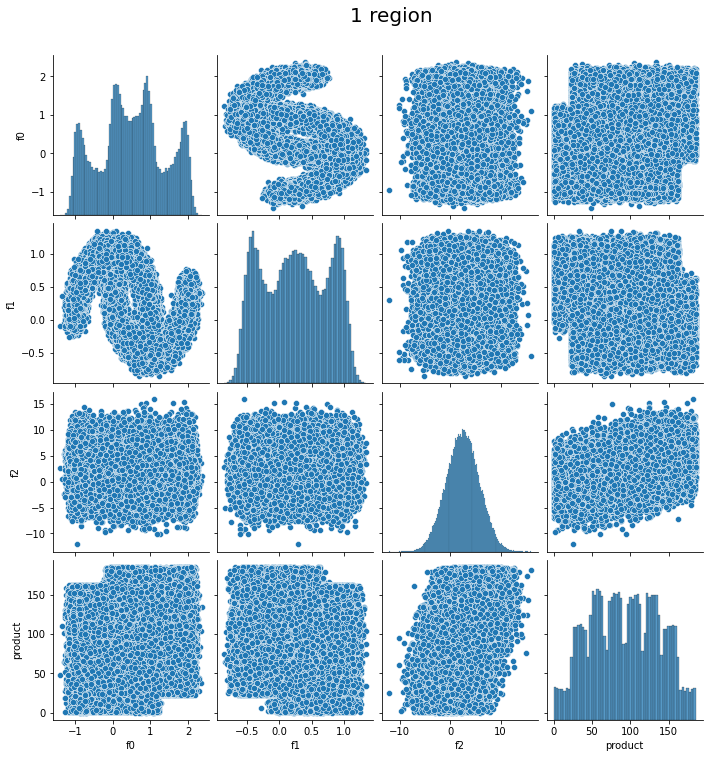

In [8]:
ax = sns.pairplot(df0)
ax.fig.suptitle('1 region', fontsize=20, x=0.55, y=1.05);

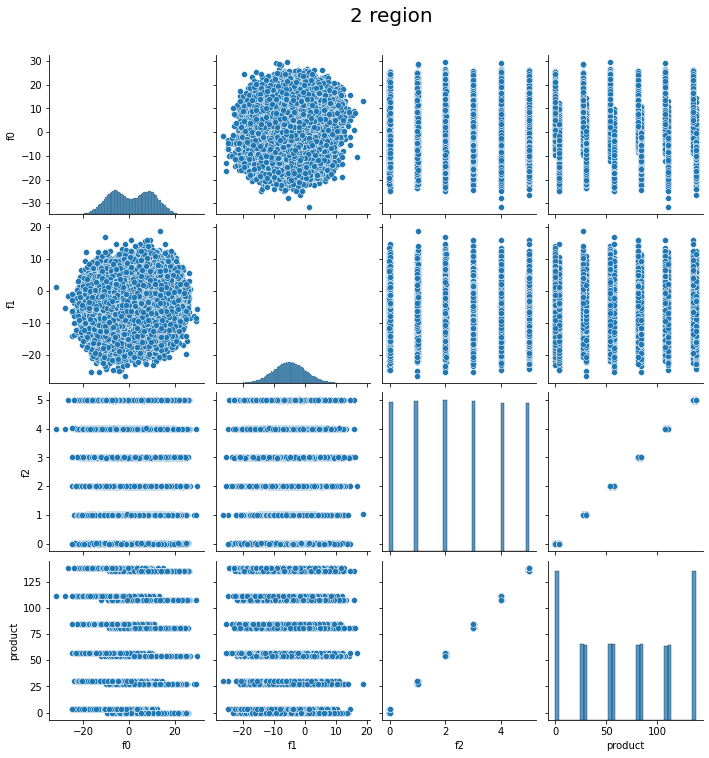

In [9]:
ax = sns.pairplot(df1)
ax.fig.suptitle('2 region', fontsize=20, x=0.55, y=1.05);

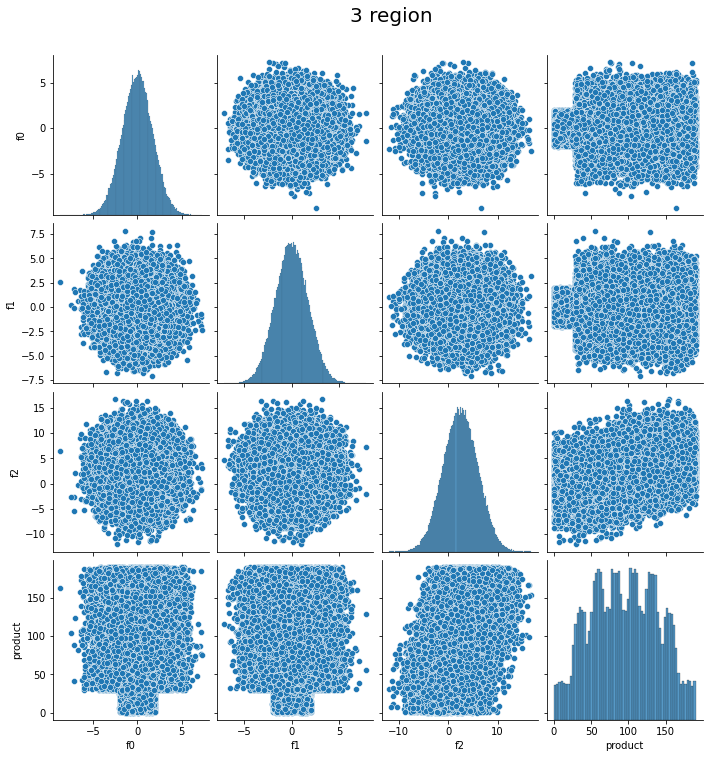

In [10]:
ax = sns.pairplot(df2)
ax.fig.suptitle('3 region', fontsize=20, x=0.55, y=1.05);

In [11]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [12]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [14]:
#дропнем столбец id
df0.drop('id', axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)

In [15]:
features_0 = df0.drop('product', axis=1)
target_0 = df0['product']
features_1 = df1.drop('product', axis=1)
target_1 = df1['product']
features_2 = df2.drop('product', axis=1)
target_2 = df2['product']

### Вывод

1. Пропусков и дубликатов в данных нет.  
2. Были дропнуты столбцы id во всех трех датасетах.  
3. Были выделены признаки:  
    а. features - `f0, f1, f2`  
    b. target - `product`


## Обучение и проверка модели

Обучим и проверим модель ждя каждого региона.  

Разделим выборку на обучающую и валидационную в соотношении 75:25.

In [16]:
features_train_0, features_test_0, target_train_0, target_test_0 = train_test_split(features_0,
                                                                                    target_0,
                                                                                    test_size=0.25,
                                                                                    random_state=rs)

In [17]:
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(features_1,
                                                                                    target_1,
                                                                                    test_size=0.25,
                                                                                    random_state=rs)

In [18]:
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(features_2,
                                                                                    target_2,
                                                                                    test_size=0.25,
                                                                                    random_state=rs)

Обучим модель

In [19]:
#ф-я всех необходимых метрик
def metrics(target_test, predicted_test):
    print(f'R2: {r2_score(target_test, predicted_test):.2f}')
    print(f'MAE: {mean_absolute_error(target_test, predicted_test):.2f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(target_test, predicted_test)):.2f}')
    raw_reserve = predicted_test.mean()
    print(f'Средний запас предсказанного сырья: {raw_reserve:.2f}')
    pass

In [20]:
#ф-я для масштабирования признаков
def scaling(features_train, features_test):
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])

In [21]:
scaling(features_train_0, features_test_0)
scaling(features_train_1, features_test_1)
scaling(features_train_2, features_test_2)

### Первый регион

In [22]:
sgd0 = SGDRegressor(tol=.0001, eta0 = .01, random_state=rs)
sgd0.fit(features_train_0, target_train_0)
predictions0 = sgd0.predict(features_test_0)
metrics(target_test_0, predictions0)

R2: 0.28
MAE: 31.11
RMSE: 37.83
Средний запас предсказанного сырья: 92.29


### Второй регион

In [23]:
sgd1 = SGDRegressor(tol=.0001, eta0 = .01, random_state=rs)
sgd1.fit(features_train_1, target_train_1)
predictions1 = sgd1.predict(features_test_1)
metrics(target_test_1, predictions1)

R2: 1.00
MAE: 0.72
RMSE: 0.89
Средний запас предсказанного сырья: 69.15


### Третий регион

In [24]:
sgd2 = SGDRegressor(tol=.0001, eta0 = .01, random_state=rs)
sgd2.fit(features_train_2, target_train_2)
predictions2 = sgd2.predict(features_test_2)
metrics(target_test_2, predictions2)

R2: 0.20
MAE: 32.65
RMSE: 39.89
Средний запас предсказанного сырья: 95.03


### Вывод

Модель лучше всего предсказывает на данных второго региона. Корень среднеквадратической ошибки = 0.89, однако в регионе предсказан самый маленький запас сырья.  

1 и 3 регионы примерно одинаковы по показателям предсказаний.  
Ошибка: 38 и 40,  
запасы сырья: 93 и 95 соответственно. 

## Подготовка к расчёту прибыли

In [25]:
TOTAL_POINTS = 500
TARGET_POINTS = 200
BUDGET = 1e10
PROFIT_PER_BARREL = 450
PROFIT_PER_UNIT = 450000
RISK_THRESHOLD = 0.025
THRESHOLD_VOL = BUDGET / PROFIT_PER_UNIT / TARGET_POINTS

In [26]:
print(f'Минимальный объем сырья для безубыточной разработки новой скважины = {THRESHOLD_VOL:.2f}')

Минимальный объем сырья для безубыточной разработки новой скважины = 111.11


In [27]:
#ф-я для сравнения по регионам
def reg_vol_comp(reg_avg_vol, THRESHOLD_VOL):
    if reg_avg_vol > THRESHOLD_VOL:
        print('в среднем прибылен')
    elif reg_avg_vol == THRESHOLD_VOL:
        print('в среднем выйдет в 0')
    else:
        print('в среднем убыточен')

In [28]:
raw_reserve0 = predictions0.mean()
raw_reserve1 = predictions1.mean()
raw_reserve2 = predictions2.mean()

In [29]:
print('Регион 1', end=' ')
reg_vol_comp(raw_reserve0, THRESHOLD_VOL)
print('Регион 2', end=' ')
reg_vol_comp(raw_reserve1, THRESHOLD_VOL)
print('Регион 3', end=' ')
reg_vol_comp(raw_reserve0, THRESHOLD_VOL)

Регион 1 в среднем убыточен
Регион 2 в среднем убыточен
Регион 3 в среднем убыточен


### Вывод

На этапе подготовки выявлено, что средний запас сырья во всех трех районах недостаточен, чтоб окупить затраты на разработку скважины. Этот факт подтверждает целесообразность настоящего исследования. Чтобы район принес прибыль, нужно предсказать скважины с максимально вероятным объемом сырья. 

## Расчёт прибыли и рисков 

In [30]:
def profit(actual, predicted):
    predicted_sorted = predicted.sort_values(ascending=False)
    actual_sorted = actual.loc[predicted_sorted.index]
    actual_sorted = actual_sorted[:TARGET_POINTS]
    revenue = actual_sorted.sum() * PROFIT_PER_UNIT
    return revenue - BUDGET

In [31]:
state = np.random.RandomState(rs)

In [32]:
def bootstrap(target_test, prediction):
    values = []
    target = target_test.reset_index(drop=True)
    predictions = pd.Series(prediction)
    for i in range(1000):
        target_subsample = target.sample(TOTAL_POINTS, random_state=state, replace=True)
        predictions_subsample = predictions.loc[target_subsample.index]
        value = profit(target_subsample, predictions_subsample)
        values.append(value)
        
    values = pd.Series(values)
    
    risk = (values < 0).mean()
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    
    print(f'2.5%-квантиль: {round(lower, 2)}')
    print(f'97.5%-квантиль: {round(upper, 2)}')
    print(f'Средняя прибыль региона: {round(values.mean(), 2)},\nРиск убытков региона: {risk:.1%}')
    print(f'При доверительном интервале от {round(lower, 2)} до {round(upper, 2)}')

In [33]:
print('Регион 1')
print('_'*25)
bootstrap(target_test_0, predictions0)

Регион 1
_________________________
2.5%-квантиль: -77227552.8
97.5%-квантиль: 964785523.43
Средняя прибыль региона: 444572993.93,
Риск убытков региона: 4.6%
При доверительном интервале от -77227552.8 до 964785523.43


In [34]:
print('Регион 2')
print('_'*25)
bootstrap(target_test_1, predictions1)

Регион 2
_________________________
2.5%-квантиль: 148703601.23
97.5%-квантиль: 962863652.25
Средняя прибыль региона: 550616344.5,
Риск убытков региона: 0.3%
При доверительном интервале от 148703601.23 до 962863652.25


In [35]:
print('Регион 3')
print('_'*25)
bootstrap(target_test_2, predictions2)

Регион 3
_________________________
2.5%-квантиль: -182734731.06
97.5%-квантиль: 938948611.15
Средняя прибыль региона: 371402684.17,
Риск убытков региона: 9.1%
При доверительном интервале от -182734731.06 до 938948611.15


## Вывод

Был проведен анализ трех регионов на предмет выбора наилучшей локаици для разработки меторождений нефти.  
В ходе исследования с помощью модели линейной регресии были сделаны предсказания запаса сырья в регионах.   
По предсказанным данным во всех трех районах *среднего* запаса недостаточно для окупаемости затрат на разработку.   
После чего с помощью *bootstrap* был определен район с наибольшей вероятностью высокой прибыльности и с наименьшими рисками не окупить затраты.  

Результаты исследования:   

Регион 1
_________________________
Средняя прибыль региона: 444572993.93,
Риск убытков региона: 4.6%
При доверительном интервале от -77227552.8 до 964785523.43

Регион 2
_________________________
Средняя прибыль региона: 550616344.5,
Риск убытков региона: 0.3%
При доверительном интервале от 148703601.23 до 962863652.25

Регион 3
_________________________
Средняя прибыль региона: 371402684.17,
Риск убытков региона: 9.1%
При доверительном интервале от -182734731.06 до 938948611.15
 _________________
  
**Заключение по итогам исследования:   
Для разработки следует выбирать район №2, как обладающий наиболее высоким потенциалом прибыльности (550616344.5) и наименьшими рисками (0.3%)**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован

☔☔☔